In [3]:
!pip install pandas matplotlib openpyxl schedule

In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\Lenovo 1\Downloads\transport_data_sample.csv") 




In [9]:
df.dropna(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
print(df.head(10))

        Date VehicleID  Distance  FuelUsed   Location DeliveryStatus
0 2024-04-07     VH005    376.72     30.79    Chennai        On Time
1 2024-01-13     VH005    308.42     20.58    Chennai        On Time
2 2024-02-15     VH011    413.19     35.84     Mumbai        On Time
3 2024-05-26     VH017    106.31      8.76      Delhi        On Time
4 2024-03-24     VH005    446.62     40.98    Chennai        On Time
5 2024-03-02     VH007    233.32     33.60  Hyderabad        Delayed
6 2024-01-12     VH018    178.11     21.64      Delhi        On Time
7 2024-01-25     VH001    483.29     33.58    Kolkata        On Time
8 2024-03-28     VH005    426.05     64.15  Hyderabad        On Time
9 2024-06-26     VH008    268.80     28.11  Bangalore        On Time


In [13]:
distance_by_vehicle = df.groupby('VehicleID')['Distance'].sum()

In [14]:
df['FuelEfficiency'] = df['Distance'] / df['FuelUsed']
avg_efficiency = df.groupby('VehicleID')['FuelEfficiency'].mean()

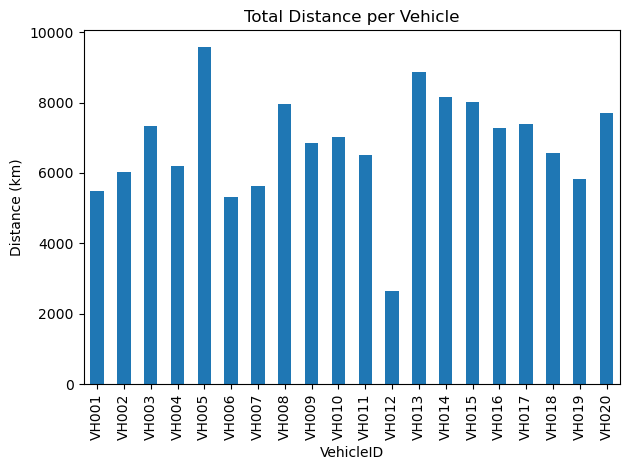

In [15]:
import matplotlib.pyplot as plt

distance_by_vehicle.plot(kind='bar', title='Total Distance per Vehicle')
plt.ylabel('Distance (km)')
plt.tight_layout()
plt.savefig('distance_chart.png')
plt.show()


In [16]:

with pd.ExcelWriter('Transport_Report.xlsx') as writer:
    df.to_excel(writer, sheet_name='Raw Data', index=False)
    distance_by_vehicle.to_frame('Total Distance').to_excel(writer, sheet_name='Distance Summary')
    avg_efficiency.to_frame('Avg Fuel Efficiency').to_excel(writer, sheet_name='Efficiency Summary')


In [ ]:
import schedule
import time

def generate_report():
    print("Generating transport report...")
    # Your full data pipeline here

schedule.every().day.at("07:00").do(generate_report)

while True:
    schedule.run_pending()
    time.sleep(60)
